In [115]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras import backend as K
import matplotlib.pyplot as plt
import cv2
from tensorflow.python.keras.models import load_model
import matplotlib.pyplot as plt
# the data, split between train and test sets
from keras.utils import np_utils
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.optimizers import SGD



In [116]:
def input_data():

    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape to be samples*pixels*width*height
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

    # One hot Code
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]

    # convert from integers to floats
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    # normalize to range [0, 1]
    X_train = (X_train / 255.0)
    X_test = (X_test / 255.0)

    return X_test, y_test, X_train, y_train

# Flatten the images.
# Flatten each 28x28 image into a 784 dimensional vector

In [117]:
def create_model():
    # Create model
    # Building CNN
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.summary()

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [118]:
# -------evaluate a model using k-fold cross-validation--------
def evaluate_model(X_train, y_Train, n_folds=5):

    accuracy, data = list(), list()

    # prepare 5-cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)

    for x_train, x_test in kfold.split(X_train):
        # create model
        model = create_model()
        # select rows for train and test
        trainX, trainY, testX, testY = X_train[x_train], y_Train[x_train], X_train[x_test], y_Train[x_test]
        # fit model
        data_fit = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        # stores accuracy
        accuracy.append(acc)
        data.append(data_fit)
    return accuracy, data


In [119]:
# plot diagnostic learning curves
def summarize_diagnostics(data):
    for i in range(len(data)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(data[i].history['loss'], color='red', label='green')
        pyplot.plot(data[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(data[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(data[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [120]:
def evaluate_model(X_train, y_Train, n_folds=5):    
    accuracy, data = list(), list()
    # prepare 5-cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)

    for x_train, x_test in kfold.split(X_train):
        # create model
        model = create_model()        # select rows for train and test
        trainX, trainY, testX, testY = X_train[x_train], y_Train[x_train], X_train[x_test], y_Train[x_test]        # fit model
        data_fit = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=10)        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)        # stores Accuracy 
        accuracy.append(acc)
        data.append(data_fit)
    return accuracy, data

In [121]:
# summarize model performance
def summarize_performance(acc):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (numpy.mean(acc) * 100, numpy.std(acc) * 100, len(acc)))

    # box and whisker plots of results
    pyplot.boxplot(acc)
    pyplot.show()

In [122]:
# This function predicts the images already in the dataset
def test(X_train, model):
    test_images = X_train[1:10]
    test_images = test_images.reshape(test_images.shape[0], 28, 28)

    for i, test_image in enumerate(test_images, start=1):
        org_image = test_image
        test_image = test_image.reshape(1, 28, 28, 1)
        prediction = model.predict_classes(test_image, verbose=0)

        print("Predicted digit: {}".format(prediction[0]))
        plt.subplot(330 + i)
        plt.axis('off')
        plt.title("Predicted digit: {}".format(prediction[0]))
        plt.imshow(org_image, cmap=plt.get_cmap('gray'))

    plt.show()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)              

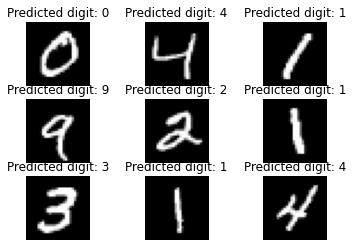

Saved model to disk


In [123]:
def run():
    X_test, y_test, X_train, y_train = input_data()

    # Evaluate
    #accuracy, data = evaluate_model(X_train, y_train)
    # summarize_diagnostics(data)
    # summarize_performance(accuracy)
    model = create_model()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
    # TEST
    # for images alreday
    test(X_train, model)

    # serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")




run()

In [ ]:
def predict(img):
    image = img.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.threshold(image, 140, 255, cv2.THRESH_BINARY_INV)[1]
    image = cv2.resize(image, (28, 28))
    #display_image(image)
    image = image.astype('float32')
    image = image.reshape(1, 28, 28, 1)
    image /= 255

    plt.imshow(image.reshape(28, 28), cmap='Greys')
    plt.show()
    model = load_model('cnn.hdf5')
    pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)

    print("Predicted Number: ", pred.argmax())

predict(cv2.imread('3.jpeg'))